Images are similar.


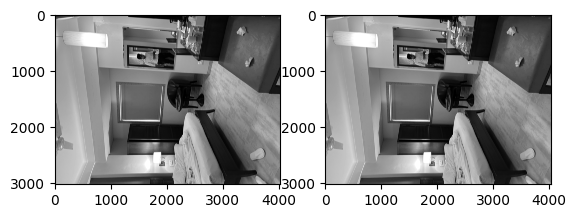

In [9]:
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load images
im1 = Image.open("/content/IMG_0545.jpg").convert('L')  # Convert to grayscale
im2 = Image.open("/content/IMG_0545.jpg").convert('L')

# Resize images to have the same dimensions
width, height = min(im1.size[0], im2.size[0]), min(im1.size[1], im2.size[1])
im1 = im1.resize((width, height))
im2 = im2.resize((width, height))

# Calculate SSIM
ssim_score = ssim(np.array(im1), np.array(im2))

# Display result
if ssim_score >= 0.86:  # Threshold for similarity
    print("Images are similar.")
else:
    print("Images are not similar.")

# Optionally, you can visualize the images
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(im1, cmap='gray')
f.add_subplot(1,2, 2)
plt.imshow(im2, cmap='gray')
plt.show()


In [10]:
import pickle

# Assuming 'model' is your trained CNN model
# Save the model to a file
with open('image_similarity_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully.")


NameError: name 'model' is not defined

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_siamese_model(input_shape):
    # Define the input layers
    input_1 = layers.Input(shape=input_shape)
    input_2 = layers.Input(shape=input_shape)

    # Define the CNN base
    cnn_base = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten()
    ])

    # Process the inputs through the CNN base
    processed_1 = cnn_base(input_1)
    processed_2 = cnn_base(input_2)

    # Compute the L1 distance between the processed inputs
    L1_distance = lambda x: tf.abs(x[0] - x[1])
    distance = layers.Lambda(L1_distance)([processed_1, processed_2])

    # Output layer
    output = layers.Dense(1, activation='sigmoid')(distance)

    # Create the model
    model = models.Model(inputs=[input_1, input_2], outputs=output)

    return model

# Define input shape (assuming grayscale images)
input_shape = (150, 150, 1)

# Create the Siamese model
siamese_model = create_siamese_model(input_shape)

# Compile the model
siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
siamese_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 1)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 150, 150, 1)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 36992)                92672     ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 lambda (Lambda)             (None, 36992)                0         ['sequential[0][0]',      

In [12]:
# Define the filename for saving the model in HDF5 format
model_h5_filename = 'siamese_model.h5'

# Save the model to a file in HDF5 format
siamese_model.save(model_h5_filename)

print("Siamese model saved successfully in HDF5 format.")


Siamese model saved successfully in HDF5 format.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
